In [1]:
import pandas as pd
import numpy as np
from Evaluations import *

In [2]:
machine_types = ["fan","pump","valve","slider","ToyCar","ToyConveyor"]
IDs = {"fan":[0,2,4,6],
       "pump":[0,2,4,6],
       "valve":[0,2,4,6],
       "slider":[0,2,4,6],
       "ToyCar":[1,2,3,4],
       "ToyConveyor":[1,2,3]}

#### Sélection d'un type de machine pour observer les données d'évaluation

In [3]:
machinetype = machine_types[0] #à sélectionner entre 0 et 5

#### Chemin vers de dossier des données d'évaluations

In [4]:
evaluation_data_file = "results/"+machinetype+"/"

## Historique de l'apprentissage des modèles pour un type de machine

#### Modèle DenseAE

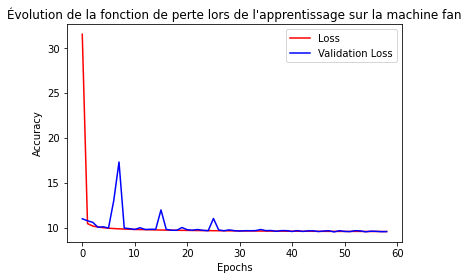

In [5]:
history_loss = np.load(evaluation_data_file+"HistoryLoss_DenseAE_"+machinetype+'.npy')
history_val_loss = np.load(evaluation_data_file+"HistoryValLoss_DenseAE_"+machinetype+'.npy')
courbe_loss(history_loss, history_val_loss, machinetype, xlim=None, ylim=None)

#### Modèle ConvolutionalAE

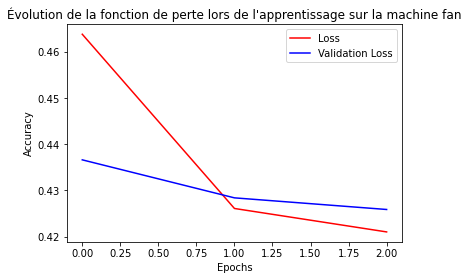

In [6]:
history_loss = np.load(evaluation_data_file+"HistoryLoss_ConvAE_"+machinetype+'.npy')
history_val_loss = np.load(evaluation_data_file+"HistoryValLoss_ConvAE_"+machinetype+'.npy')
courbe_loss(history_loss,history_val_loss,machinetype,xlim=None,ylim=None)

## Courbes ROC par ID

#### Modèle DenseAE

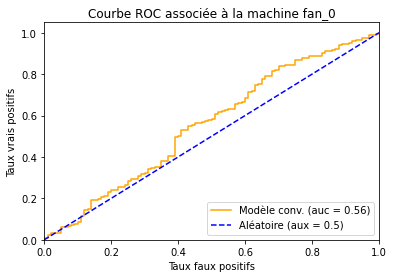

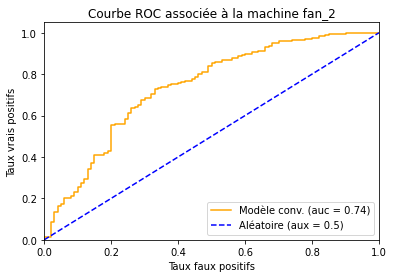

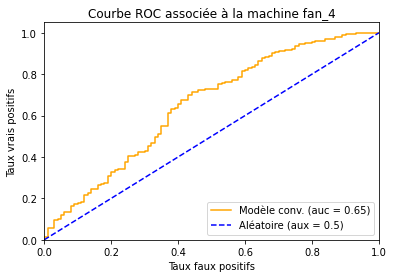

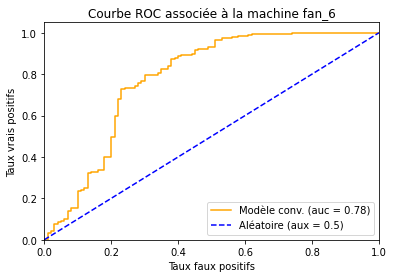

In [7]:
for machineID in IDs[machinetype]:
    y_true = get_y_true("Path_DF.csv", machinetype, machineID)
    errors_test = np.load(evaluation_data_file+"TestErrors_DenseAE_"+machinetype+'_'+str(machineID)+".npy")
    courbe_ROC(y_true, errors_test, machinetype, str(machineID))

#### Modèle ConvolutionalAE

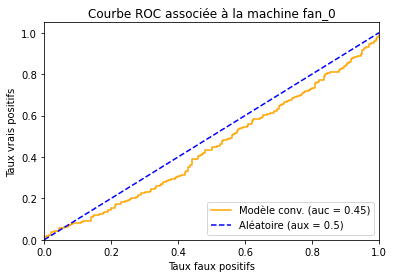

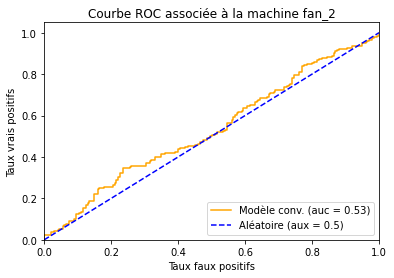

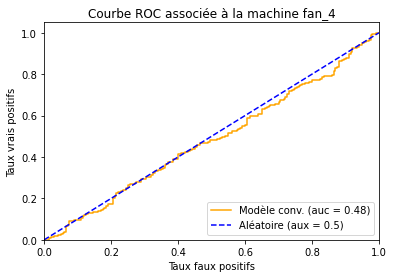

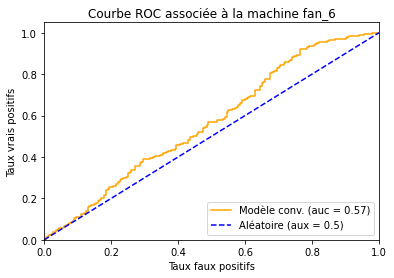

In [8]:
for machineID in IDs[machinetype]:
    y_true = get_y_true("Path_DF.csv", machinetype, machineID)
    errors_test = np.load(evaluation_data_file+"TestErrors_ConvAE_"+machinetype+'_'+str(machineID)+".npy")
    courbe_ROC(y_true, errors_test, machinetype, str(machineID))

## Courbes des F1-scores par ID

On observe l'effet qu'a le seuil de détection d'anomalie sur les F1-scores des 2 classes.

#### Modèle DenseAE

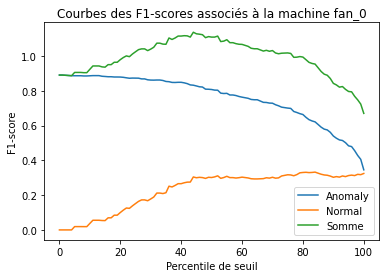


Le score F1 maximum de la classe "Anomaly" est 0.891 et est atteint lorsque le seuil est au percentile 0 

Le score F1 maximum de la classe "Normal" est 0.332 et est atteint lorsque le seuil est au percentile 84 

La somme maximum des scores F1 est 1.137 et est atteinte lorsque le seuil est au percentile 44


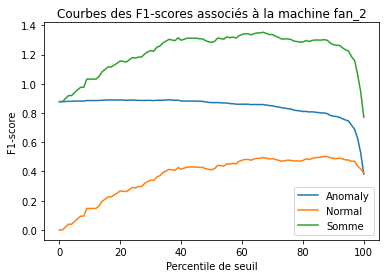


Le score F1 maximum de la classe "Anomaly" est 0.89 et est atteint lorsque le seuil est au percentile 36 

Le score F1 maximum de la classe "Normal" est 0.502 et est atteint lorsque le seuil est au percentile 87 

La somme maximum des scores F1 est 1.353 et est atteinte lorsque le seuil est au percentile 67


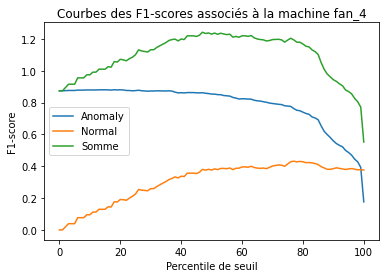


Le score F1 maximum de la classe "Anomaly" est 0.881 et est atteint lorsque le seuil est au percentile 18 

Le score F1 maximum de la classe "Normal" est 0.432 et est atteint lorsque le seuil est au percentile 77 

La somme maximum des scores F1 est 1.243 et est atteinte lorsque le seuil est au percentile 47


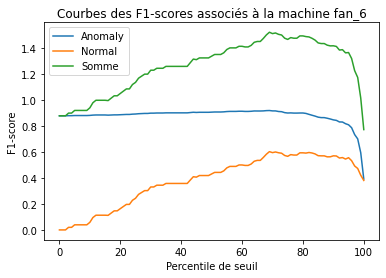


Le score F1 maximum de la classe "Anomaly" est 0.919 et est atteint lorsque le seuil est au percentile 69 

Le score F1 maximum de la classe "Normal" est 0.603 et est atteint lorsque le seuil est au percentile 69 

La somme maximum des scores F1 est 1.522 et est atteinte lorsque le seuil est au percentile 69


In [9]:
for machineID in IDs[machinetype]:
    f1_1 = np.load(evaluation_data_file+"DenseAE_F1_1"+machinetype+'_'+str(machineID)+".npy")
    f1_0 = np.load(evaluation_data_file+"DenseAE_F1_0"+machinetype+'_'+str(machineID)+".npy")
    somme = np.load(evaluation_data_file+"DenseAE_F1_somme"+machinetype+'_'+str(machineID)+".npy")
    courbes_f1score(f1_1, f1_0, somme, machinetype, str(machineID))

#### Modèle ConvolutionalAE

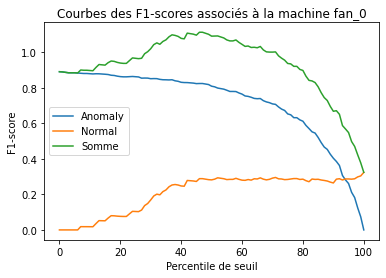


Le score F1 maximum de la classe "Anomaly" est 0.891 et est atteint lorsque le seuil est au percentile 0 

Le score F1 maximum de la classe "Normal" est 0.324 et est atteint lorsque le seuil est au percentile 100 

La somme maximum des scores F1 est 1.113 et est atteinte lorsque le seuil est au percentile 46


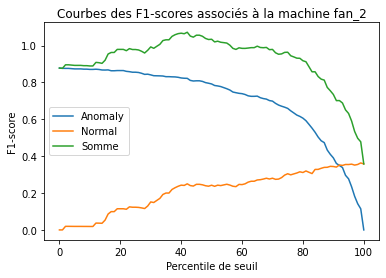


Le score F1 maximum de la classe "Anomaly" est 0.878 et est atteint lorsque le seuil est au percentile 0 

Le score F1 maximum de la classe "Normal" est 0.363 et est atteint lorsque le seuil est au percentile 99 

La somme maximum des scores F1 est 1.072 et est atteinte lorsque le seuil est au percentile 42


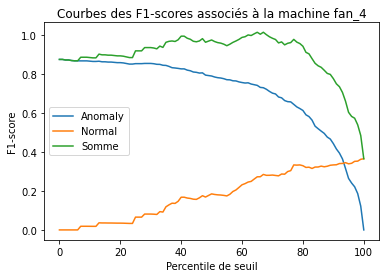


Le score F1 maximum de la classe "Anomaly" est 0.874 et est atteint lorsque le seuil est au percentile 0 

Le score F1 maximum de la classe "Normal" est 0.365 et est atteint lorsque le seuil est au percentile 100 

La somme maximum des scores F1 est 1.014 et est atteinte lorsque le seuil est au percentile 67


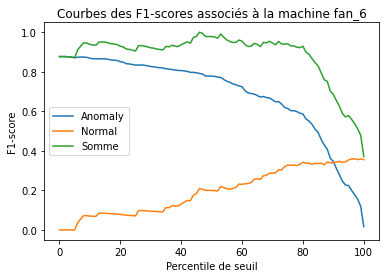


Le score F1 maximum de la classe "Anomaly" est 0.877 et est atteint lorsque le seuil est au percentile 0 

Le score F1 maximum de la classe "Normal" est 0.36 et est atteint lorsque le seuil est au percentile 99 

La somme maximum des scores F1 est 1.0 et est atteinte lorsque le seuil est au percentile 46


In [10]:
for machineID in IDs[machinetype]:
    f1_1 = np.load(evaluation_data_file+"ConvAE_F1_1"+machinetype+'_'+str(machineID)+".npy")
    f1_0 = np.load(evaluation_data_file+"ConvAE_F1_0"+machinetype+'_'+str(machineID)+".npy")
    somme = np.load(evaluation_data_file+"ConvAE_F1_somme"+machinetype+'_'+str(machineID)+".npy")
    courbes_f1score(f1_1, f1_0, somme, machinetype, str(machineID))